Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **19Feb2019**

# 03a. Nuclear Reactor Point Dynamics: Constant Reactivity 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Problem Statement](#ps)
* [Input Data](#data)
* [Degrees of Freedom](#dof)
* [Steady state](#ss)
* [Function library](#flib)
* [One-Group Energy Neutron Balance](#nbal)
* [Reactivity Step Change w/o Source](#rhostep)
  - Super-critical
  - Sub-critical
* Pulsed Source
  - [Critical](#cpulsedq)
  - [Sub-critical](#sbcpulsedq)
  - [Super-Critical Booster](#spcpulsedq)
* [Sudden Insertion of Steady Source, Critical](#qinsert)
* [Sudden Removal of Steady Source, Sub-Critical](#qremove)
* [Frequency Response to Source Fluctuation, Sub-Critical](#freqresp)
* [Interactive Results](#ires)
---

## Objectives<a id="obj"></a>
+ Use one-group energy, point-reactor dynamics modeling (six-group delayed neutron emitters) to obtain insight on neutron density behavior with constant reactivity.
+ Step change in reactivity.
+ Source impulse response.
+ Insertion/removal of a steady source.
+ Frequency response to fluctuating source strength.

## Introduction<a id="intro"></a>

In-class course notes OneNote [ChEn-4350-ptreactor](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/Etbg-n1j6DRLsyHFvE8CzlABBzBcnHkurPOjZw8MMpWpVQ?e=TCbsFq).

A summary of this topic can be found in the textbooks: 

+ *Fundamentals of Nuclear Science and Engineering*, J. K. Shutils and R. E. Faw, CRC, 2017, 3$^\text{rd}$ edition, 638 pp., Chapter 10.

+ *Introduction to Nuclear Engineering*, J. R. Lamarsh and A. J. Baratta, Pearson, 2018, 4$^\text{th}$ edition, 802 pp., Chapter 7.

Extensive background for this topic can be found in the textbook: *Dynamics of Nuclear Reactors*, David L. Hetrick, 1993, ANS, 542 pp. 

A power nuclear reactor is a heat generation device. In most cases, nuclear heat (heat generated by nuclear fission reactions) is then converted in work through a heat-work cycle on the heated fluid passed through the reactor (figure below). A very simplified modeling of all types of nuclear reactors has been developed in the early days of nuclear engineering. The point-reactor model is an introduction to the subject of nuclear reactor dynamics. It disregards space variations of the neutron density (*i.e.* it is a pointwise approach), it considers dynamics for a one-group energy of neutrons, it only applies to conditions when the reactor is near criticality and the nuclear fuel is nearly static. In this model, a pointwise neutron balance 
is performed using the main components of neutron transport, namely prompt fission, delayed fission, scattering, and absorption (figure below); scattering is taking into account in the diffusion limit.


![](images/point-reactor.png)

## Problem Statement<a id="ps"></a>

Given the neutron generation time $\ell$, delayed neutron fraction, $\beta$, decay constants of a six-group delayed neutron emitters, $\lambda_i$, and corresponding yield of delayed neutron fractions for each emitter, $\beta_i$, calculate the pointwise neutron density variation with time (response) due to various practical conditions of a working nuclear reactor.

## Input Data<a id="data"></a>

Name                        | Parameter          | Value                | Unit             |
----------------------------|--------------------|----------------------|------------------| 
neutron generation time     | $\ell$             | $1\times 10^{-4}$    |  s               | 
delayed neutron fraction    | $\beta$            | $6.5\times 10^{-3}$  |                  |


For thermal fission of $^{235}$U the following six-group delayed neutron precursors data is typically used (*Dynamics of Nuclear Reactors*, David Hetrick, 1993, ANS textbook).


Delayed neutron emitter group No. | Decay cte ($\lambda_i$,1/sec) | Relative yield ($\beta_i/\beta$) |
----------------------------------|-------------------------------|----------------------------------| 
1                                 | 0.0124                        | 0.033                            |
2                                 | 0.0305                        | 0.219                            | 
3                                 | 0.111                         | 0.196                            |  
4                                 | 0.301                         | 0.395                            | 
5                                 | 1.14                          | 0.115                            |
6                                 | 3.01                          | 0.042                            |

In [41]:
'''Parameters dictionary container'''

params = dict()

params['gen_time']          = 1.0e-4  # s
params['beta']              = 6.5e-3  # 
params['species_decay']     = [0.0124, 0.0305, 0.111, 0.301, 1.14, 3.01] # 1/sec
params['species_rel_yield'] = [0.033, 0.219, 0.196, 0.395, 0.115, 0.042] 

## One-Group Energy Neutron Balance<a id="nbal"></a>

The space-invariant neutron balance for the point-reactor model is

\begin{equation*}
\frac{\text{d}n}{\text{d}t}  = \frac{\rho(t)-\beta}{\ell}\, n + \sum\limits_{i=1}^{6} \lambda_i\,c_i + q(t) ,
\end{equation*}

where the first term on the right side of the equation represents the net production of neutrons not account for delayed neutrons, and the second term accounts for the source of delayed neutrons considering 6 groups of delayed neutron emitters resulting from the fission of $^{235}$U nuclei. The last term on the right side is a time-dependent source. Therefore a balance of neutron emitter species is also necessary

\begin{equation*}
\frac{\text{d}c_i}{\text{d}t}  = \frac{\beta_i}{\ell}\, n - \lambda_i\,c_i ,
     \ \ \ \ \ \forall \ \ \ \ \  i=1,\ldots,6.
\end{equation*}

where the first term on the right side of the equation is the source of emitters as a function of the neutron number density $n(t)$, and the second term is the consumption rate of the emitter by radioactive decay obtained as a function of the product of the number concentration of the emmiter, $c_i(t)$, multiplied by its decay constant $\lambda_i$. Here the number concentration of of the $i$th emitter, $c_i$ is considered in terms of delayed neutron number density, hence the units are the same as $n$.

## Degrees of Freedom<a id="dof"></a>
There exists seven equations, the neutron density balance, and six neutron emitting species balance. There exists seven unknown variables, $n(t)$ and $c_i(t)$. Therefore there are as many unknowns as there are equations and the problem is potentially solvable given the initial conditions for the unknowns, and all the values of the parameters in the foregoing table.

## Steady State<a id="ss"></a>

Neutron density and delayed neutron precursor concentrations are related as follows:

\begin{align*}
n_\text{ss}  &= -\frac{q_\text{ss}\,\ell }{\rho_\text{ss} }
\\
c_{i_\text{ss}}  &= \frac{\beta_i}{\lambda_i\,\ell}\, n_\text{ss}   \ \ \ \ \forall \ \ \ \ i=1,\ldots,6 .
\end{align*}

In [91]:
'''Setup function for delayed neutron species concentrations at steady state'''

def setup_initial_conditions(params):
    
    n_species = len(params['species_decay'])
    
    assert len(params['species_rel_yield']) == n_species
    
    import numpy as np
    c_vec_0 = np.zeros(n_species,dtype=np.float64) # initialize conentration vector

    species_decay = params['species_decay'] # retrieve list of decay constants
    lambda_vec    = np.array(species_decay) # create a numpy vector

    species_rel_yield = params['species_rel_yield']
    beta_vec = np.array(species_rel_yield) * beta  # create the beta_i's vector

    gen_time = params['gen_time'] # retrieve neutron generation time

    n_ss = params['n_ss']
    c_vec_ss = beta_vec/lambda_vec/gen_time * n_ss # compute the steady state precursors number density
    
    params['c_vec_ss'] = c_vec_ss
    
    # setup initial condition for variables
    params['n_0']     = n_ss
    params['c_vec_0'] = c_vec_ss
    
    return

## Vector ODE System<a id="vodes"></a>

Refer to course notes OneNote [ChEn-3170-odes](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EmY427F-dSBKkpfFOx4ikf8BVAlJXL5iep1g7V7hcTQxJQ?e=98c69b).

A vector notation for the foregoing system of equations greatly improves the generality of the derived computer code. Towards this goal let us define

\begin{equation*}
\frac{d\uvar}{dt} = \fvar( \uvar, t )
\end{equation*}

where $\uvar(t) = (u_1,u_2,u_3,u_4,u_5,u_6,u_7)$ is the state vector and we assign 

\begin{align*}
 u_1(t)&=n(t),\\
 u_2(t)&=c_1(t),\\
 u_3(t)&=c_2(t),\\
 u_4(t)&=c_3(t),\\
 u_5(t)&=c_4(t),\\
 u_6(t)&=c_5(t),\\
 u_7(t)&=c_6(t).
\end{align*}

Also for $\fvar(\uvar,t) = \bigl(f_1(\uvar,t), f_2(\uvar,t), f_3(\uvar,t), f_4(\uvar,t), f_5(\uvar,t), f_6(\uvar,t), f_7(\uvar,t)\bigr)$ we assign 

\begin{align*}
 f_1 & = \frac{\rho(t)-\beta}{\ell}\, u_1 + \sum\limits_{i=2}^{7} \lambda_i\,u_i + q(t), \\
 f_2 & = \frac{\beta_1}{\ell}\, u_1 - \lambda_1\,u_2, \\
 f_3 & = \frac{\beta_2}{\ell}\, u_1 - \lambda_2\,u_3, \\
 f_4 & = \frac{\beta_3}{\ell}\, u_1 - \lambda_3\,u_4, \\
 f_5 & = \frac{\beta_4}{\ell}\, u_1 - \lambda_4\,u_5, \\
 f_6 & = \frac{\beta_5}{\ell}\, u_1 - \lambda_5\,u_6, \\
 f_7 & = \frac{\beta_6}{\ell}\, u_1 - \lambda_6\,u_7 .
\end{align*}

Finally, the initial conditions given are as follows:

\begin{align*}
 u_1(0)&=n_0,\\
 u_2(0)&=c_{1_0},\\
 u_3(0)&=c_{2_0},\\
 u_4(0)&=c_{3_0},\\
 u_5(0)&=c_{4_0},\\
 u_6(0)&=c_{5_0},\\
 u_7(0)&=c_{6_0}
\end{align*}

where $n_0$ and $c_{i_0}$ are initial values for the unknowns given by the problem specification.

## Function Library <a id="flib"></a>

Functions used later in the notebook.

In [193]:
'''Source function'''

def q_source( t, params ):
    '''
    Neutron source delta function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. It must have a `'q_0'` key/value pair.
    
    Returns
    -------
    q: float
        Value of source.

    Examples
    --------
    '''
    
    q = 0.0
    q_0 = params['q_0']
    
    if t <= 1e-5: # small time value
        q = q_0
    else:
        q = 0.0
        
    return q

In [194]:
'''ODE function'''

def f_vec( time, u_vec, params ):  
    
    import numpy as np
    assert np.all(u_vec >= 0.0)
    
    n_dens = u_vec[0]
    
    gen_time = params['gen_time'] 
    beta     = params['beta']
    
    species_decay = params['species_decay']
    lambda_vec    = np.array(species_decay)
    
    species_rel_yield = params['species_rel_yield']
    beta_vec = np.array(species_rel_yield) * beta
    
    assert len(lambda_vec)==len(beta_vec)
    
    reactivity = params['reactivity']
    
    q_source_t = q_source(time, params)
         
    c_vec = u_vec[1:]
    #print('c_vec = ',c_vec)
    
    n_species = len(lambda_vec)
    f_tmp = np.zeros(n_species+1,dtype=np.float64) # vector for f_vec return
    
    # neutron balance
    f_tmp[0] = (reactivity - beta)/gen_time * n_dens + lambda_vec @ c_vec + q_source_t
    #print('a=',(reactivity - beta)/gen_time * n_dens)
    #print('b=',lambda_vec @ c_vec)
    #print('f_tmp[0]',f_tmp[0])
    
    # loop over 6 species balance
    #for i in range(6):
        #f_tmp[i+1] = species_rel_yield[i]*beta/gen_time * n_dens - lambda_vec[i] * u_vec[i+1]
    f_tmp[1:] = beta_vec/gen_time * n_dens - lambda_vec * c_vec
    #print('f_tmp=',f_tmp)
    #print('time=',time)
    #print('')
    
    return f_tmp

In [195]:
'''Create the point-reactor run function'''

def run_point_reactor( f_vec, params ):

    from scipy.integrate import odeint # Load ODE solver package

    import numpy as np
    time_final = params['time_final']
    n_time_stamps = params['n_time_stamps']
    time_stamps = np.linspace(0.0, time_final, num=n_time_stamps) # create the time stamps for solution values
    params['time_stamps'] = time_stamps
    
    max_n_steps_per_time_step = 100 # max number of nonlinear algebraic solver iterations per time step

    n_0     = params['n_0']
    c_vec_0 = params['c_vec_0']
       
    # seven-equation point reactor model
    n_species = len(c_vec_0)
    u_vec_0 = np.zeros(n_species+1,dtype=np.float64)
    
    u_vec_0[0]  = n_0
    u_vec_0[1:] = c_vec_0
            
    (u_vec_history, info_dict) = odeint( f_vec, u_vec_0, time_stamps,
                                         args=( params, ),
                                         rtol=1e-4, atol=1e-4, mxstep=max_n_steps_per_time_step,
                                         full_output=True, tfirst=True )

    assert info_dict['message']=='Integration successful.',\
                     'Fatal: scipy.integrate.odeint failed %r'%info_dict['message']
    
    return u_vec_history

In [196]:
'''Plotting function definition'''

def plot_results(u_vec_history,semi_log=False):
    
    import matplotlib.pyplot as plt
    
    fig, ax1 = plt.subplots(1, figsize=(12, 6))

    ax2 = ax1.twinx() # duplicate x axes to plot n and c_i's in different y axes
    
    color_ids = np.linspace(0,1,u_vec_history[:,1:].shape[1])
    
    time_stamps = params['time_stamps']
    
    for (j,color_id) in zip( range(u_vec_history[:,1:].shape[1]), color_ids ):
        color=plt.cm.nipy_spectral(color_id)
        
        ax2.plot(time_stamps,u_vec_history[:,j+1]/params['c_vec_0'][j],'-.',color=color,label=r'$c_%i$'%(j+1) )
        
    ax2.set_ylabel(r'$c_i/c_{i_0}$',fontsize=16,color='black')
    ax2.tick_params(axis='y', labelcolor='black', labelsize=14)
    ax2.legend(loc='lower right',fontsize=12)
    if semi_log == True:
        ax2.set_yscale('log') # uncomment to plot y in log scale
    #ax2.grid(True)

    ax1.plot(time_stamps,u_vec_history[:,0]/params['n_0'],'-',marker='+',color='red',label=r'$n/n_0$' )
    #ax1.plot(time_stamps,u_vec_history[:,0]/params['n_0'],'-',color='red',label=r'$n/n_0$' )

    ax1.set_xlabel(r'Time [s]',fontsize=16)
    ax1.set_ylabel(r'$n/n_0$',fontsize=16,color='black')
    ax1.tick_params(axis='y', labelcolor='black', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best',fontsize=12)
    if semi_log == True:
        ax1.set_yscale('log') # uncomment to plot y in log scale
    ax1.grid(True)

    plt.title(r'Point-Reactor Model: $\rho/\beta=$'
              +str(params['reactivity']/params['beta'])
              +r'; $q_0=$'+str(round(params['q_0'],2)),
              fontsize=18)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

In [197]:
'''Utility function to peak at results table'''

def peek(time,data, head=5, tail=5):  

    import pandas as pd
    
    layout = {'time':time[:head]}
    layout['n'] = data[:head,0]
    for j in range(1,data.shape[1]):
        layout['c_%i'%j] = data[:head,j]
    results = pd.DataFrame(layout)
    print(round(results,3))
    print('')
    
    layout = {'time':time[-tail:]}
    layout['n'] = data[-tail:,j]
    for j in range(1,data.shape[1]):
        layout['c_%i'%j] = data[-tail:,j]
    results = pd.DataFrame(layout)
    print(round(results,3))
    print('')

## Reactivity Step Change w/o Source<a id="rhostep"></a>

Assuming a critical, steady-state reactor, without source, $q_\text{ss}=0$ , then $n_\text{ss}$ is arbitrary. 
Introducing a step-change in relative reactivity or "dollar" reactivity, $\frac{\rho_0}{\beta}$, parameter, compute the evolution of the reactor from steady state.

In [115]:
'''Setup up initial conditions'''

import numpy as np

params['q_0'] = 0.0 # must set the initial value of the source here

params['n_ss'] = np.random.random() # arbitrary value at steady state

rho_0_over_beta = 0.1 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta = 10 cents"

# setup remaining initial conditions
setup_initial_conditions(params)

In [122]:
'''Evolve the point-reactor'''

time_final    = 100 # s
n_time_stamps = 200 # number of solution values in time

params['time_final']    = time_final
params['n_time_stamps'] = n_time_stamps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

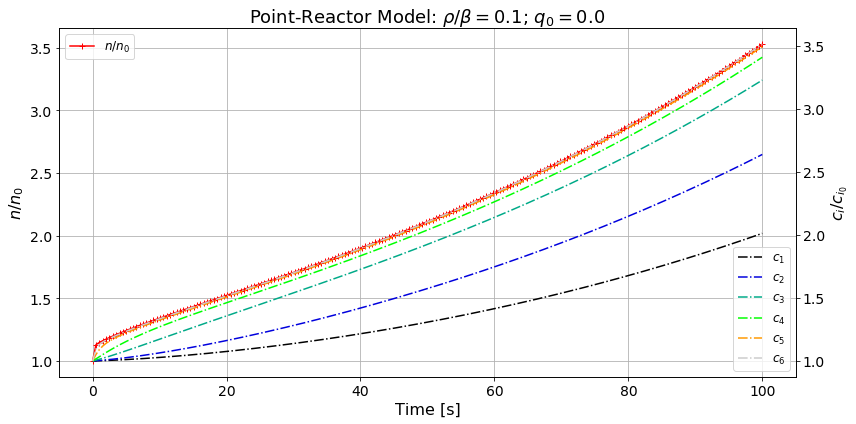

In [123]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [124]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n      c_1      c_2     c_3     c_4    c_5    c_6
0  0.000  0.751  129.907  350.498  86.193  64.058  4.924  0.681
1  0.503  0.849  130.002  351.121  86.741  65.114  5.179  0.746
2  1.005  0.861  130.113  351.853  87.362  66.218  5.368  0.770
3  1.508  0.872  130.236  352.655  88.020  67.303  5.507  0.783
4  2.010  0.882  130.370  353.517  88.706  68.359  5.615  0.794

      time      n      c_1      c_2      c_3      c_4     c_5    c_6
0   97.990  2.346  256.681  906.329  272.739  214.086  16.864  2.346
1   98.492  2.358  257.883  911.012  274.141  215.186  16.950  2.358
2   98.995  2.370  259.091  915.719  275.551  216.291  17.037  2.370
3   99.497  2.382  260.306  920.449  276.968  217.402  17.125  2.382
4  100.000  2.394  261.528  925.203  278.392  218.518  17.213  2.394



In [125]:
'''For the die-hard'''

print(np.round(u_vec_history[:5,:],3))

[[  0.751 129.907 350.498  86.193  64.058   4.924   0.681]
 [  0.849 130.002 351.121  86.741  65.114   5.179   0.746]
 [  0.861 130.113 351.853  87.362  66.218   5.368   0.77 ]
 [  0.872 130.236 352.655  88.02   67.303   5.507   0.783]
 [  0.882 130.37  353.517  88.706  68.359   5.615   0.794]]


## Pulsed Source: Critical Reactor<a id="cpulsedq"></a>

Assuming a critical, steady-state reactor, $\rho_\text{ss}=0$, with no source, $q_\text{ss} = 0$, then, $n_\text{ss}$ is arbitrary.
A strong enough source pulse is given at $t = 0$, *i.e.* a Dirac delta function: $q(t)=Q_0\,\delta(t)$.

In [130]:
'''Setup up initial conditions'''

import numpy as np

rho_ss = 0.0
rho_0_over_beta = rho_ss # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # set the reactivity

params['n_ss'] = np.random.random() # arbitrary value at steady state

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 10/gen_time # impulse at t = 0

# setup remaining initial conditions
setup_initial_conditions(params)

In [136]:
'''Evolve the point-reactor'''

time_final   = 60 # s
n_time_steps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_steps'] = n_time_steps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

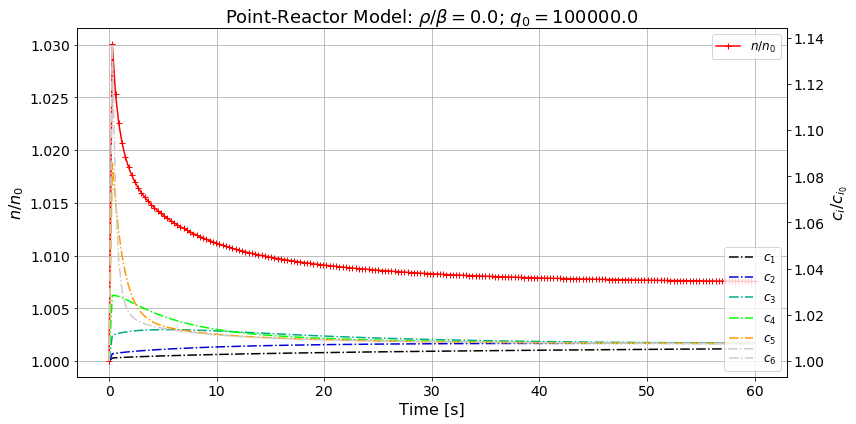

In [137]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [138]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n     c_1     c_2     c_3     c_4    c_5    c_6
0  0.000  0.165  28.498  76.889  18.908  14.052  1.080  0.149
1  0.302  0.170  28.534  77.127  19.117  14.452  1.173  0.170
2  0.603  0.169  28.537  77.144  19.127  14.451  1.154  0.160
3  0.905  0.168  28.539  77.159  19.135  14.445  1.140  0.156
4  1.206  0.168  28.541  77.171  19.141  14.437  1.130  0.154

     time      n     c_1     c_2     c_3     c_4    c_5    c_6
0  58.794  0.151  28.648  77.475  19.055  14.159  1.088  0.151
1  59.095  0.151  28.649  77.475  19.055  14.159  1.088  0.151
2  59.397  0.151  28.649  77.475  19.054  14.159  1.088  0.151
3  59.698  0.151  28.649  77.475  19.054  14.159  1.088  0.151
4  60.000  0.151  28.649  77.475  19.054  14.159  1.088  0.151



## Pulsed Source: Sub-Critical Reactor <a id="sbcpulsedq"></a>

Assuming a sub-critical, steady-state reactor, $\rho_\text{ss}\lt 0$, then some corresponding source $q_\text{ss}$, produces $n_\text{ss}=-\frac{q_\text{ss}\,\ell}{\rho_\text{ss}}$.
A strong enough source pulse is given at $t = 0$, *i.e.* a Dirac delta function: $q(t)=Q_0\,\delta(t)$.

In [139]:
'''Setup up initial conditions'''

import numpy as np

rho_ss_over_beta = -0.1 # $

beta = params['beta'] # retrieve the delayed neutron fraction
rho_ss = rho_ss_over_beta * beta # set the reactivity
params['reactivity'] = rho_ss

n_ss = np.random.random() # pick an arbitray value for the steady state
params['n_ss'] = n_ss

gen_time = params['gen_time'] # retrieve neutron generation time
q_ss = - n_ss * rho_ss / gen_time

params['q_0'] = 1000 * q_ss # impulse at t = 0

# setup remaining initial conditions
setup_initial_conditions(params)

In [146]:
'''Evolve the point-reactor'''

time_final   = 100 # s
n_time_steps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_steps'] = n_time_steps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

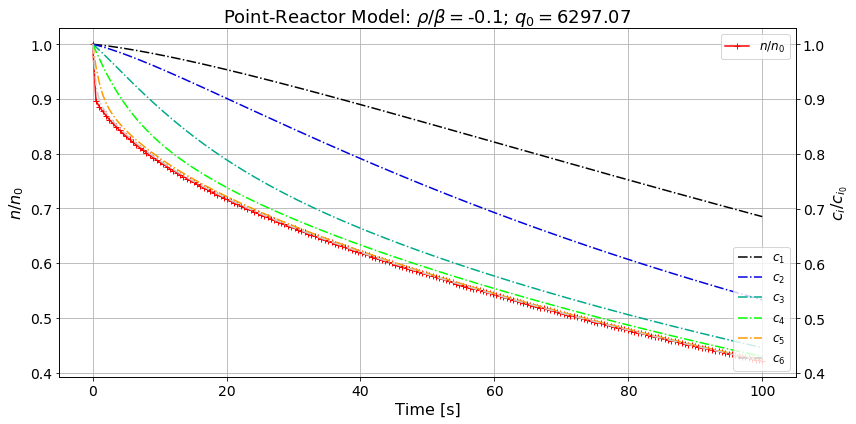

In [147]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [142]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

     time      n      c_1      c_2      c_3     c_4    c_5    c_6
0   0.000  0.969  167.583  452.150  111.192  82.636  6.352  0.879
1   5.025  0.805  166.212  443.407  104.602  73.347  5.349  0.734
2  10.050  0.760  164.336  432.197   98.132  67.779  5.031  0.692
3  15.075  0.724  162.155  419.930   92.483  63.966  4.787  0.659
4  20.101  0.694  159.765  407.241   87.656  60.984  4.583  0.631

       time      n    c_1    c_2    c_3    c_4    c_5    c_6
0   979.899  0.002  0.766  1.358  0.285  0.205  0.016  0.002
1   984.925  0.002  0.744  1.318  0.277  0.199  0.015  0.002
2   989.950  0.002  0.723  1.281  0.269  0.193  0.015  0.002
3   994.975  0.002  0.702  1.244  0.261  0.188  0.014  0.002
4  1000.000  0.002  0.682  1.208  0.254  0.182  0.014  0.002



## Pulsed Source: Super-Critical Booster<a id="spcpulsedq"></a>

Assuming a steady-state reactor with no source, $q_\text{ss}=0$, then $\rho_\text{ss}=0$, and a booster can be applied to put it in super-critical state, $\frac{\rho_0}{\beta} \gt 0$.
A strong enough source pulse is given at $t = 0$, *i.e.* a Dirac delta function: $q(t)=Q_0\,\delta(t)$.

In [148]:
'''Setup up initial conditions'''

import numpy as np

params['n_ss'] = np.random.random() # arbitrary value at steady state

rho_0_over_beta = 0.1 # $

beta = params['beta'] # retrieve the delayed neutron fraction
params['reactivity'] = rho_0_over_beta * beta # "rho/beta = 10 cents"

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 0.0001/gen_time # impulse at t = 0

# setup remaining initial conditions
setup_initial_conditions(params)

In [149]:
'''Evolve the point-reactor'''

time_final   = 10 # s
n_time_steps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_steps'] = n_time_steps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

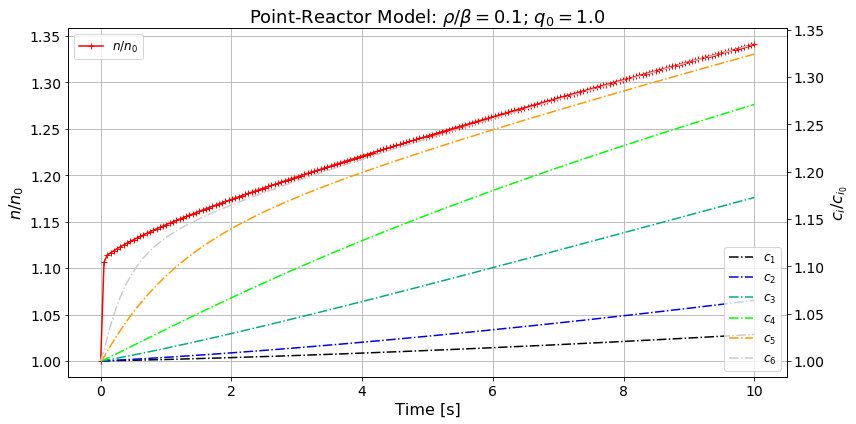

In [150]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [64]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n      c_1      c_2     c_3     c_4    c_5    c_6
0  0.000  0.687  118.821  320.587  78.838  58.591  4.504  0.623
1  0.050  0.760  118.827  320.624  78.871  58.658  4.523  0.630
2  0.101  0.765  118.835  320.679  78.920  58.755  4.550  0.639
3  0.151  0.767  118.843  320.735  78.970  58.854  4.576  0.646
4  0.201  0.769  118.852  320.793  79.021  58.953  4.602  0.653

     time      n      c_1      c_2     c_3     c_4    c_5    c_6
0   9.799  0.829  122.058  340.569  92.167  74.232  5.947  0.829
1   9.849  0.830  122.081  340.704  92.241  74.294  5.952  0.830
2   9.899  0.830  122.104  340.839  92.315  74.357  5.956  0.830
3   9.950  0.831  122.127  340.975  92.389  74.419  5.960  0.831
4  10.000  0.832  122.150  341.111  92.463  74.481  5.965  0.832



## Sudden Insertion of Steady Source; Critical<a id="qinsert"></a>

Assuming a steady-state reactor with no source, $q_\text{ss}=0$, then $\rho_\text{ss}=0$, and $n_\text{ss}$ is undetermined. Then, a constant source is inserted at $t = 0$, $q(t)=Q_0$.

In [65]:
'''Source function'''

def q_source( t, params ):
    '''
    Neutron source delta function.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. It must have a `'q_0'` key/value pair.
    
    Returns
    -------
    q: float
        Value of source.

    Examples
    --------
    '''
    
    q_0 = params['q_0']   
        
    return q_0

In [66]:
'''Setup up initial conditions'''

import numpy as np

params['n_ss'] = np.random.random() # arbitrary value at steady state

rho_ss = 0
params['reactivity'] = rho_ss 

gen_time = params['gen_time'] # retrieve neutron generation time
params['q_0'] = 1e-4/gen_time   # constant source inserted

# setup remaining initial conditions
setup_initial_conditions(params)

In [153]:
'''Evolve the point-reactor'''

time_final   = 100 # s
n_time_steps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_steps'] = n_time_steps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

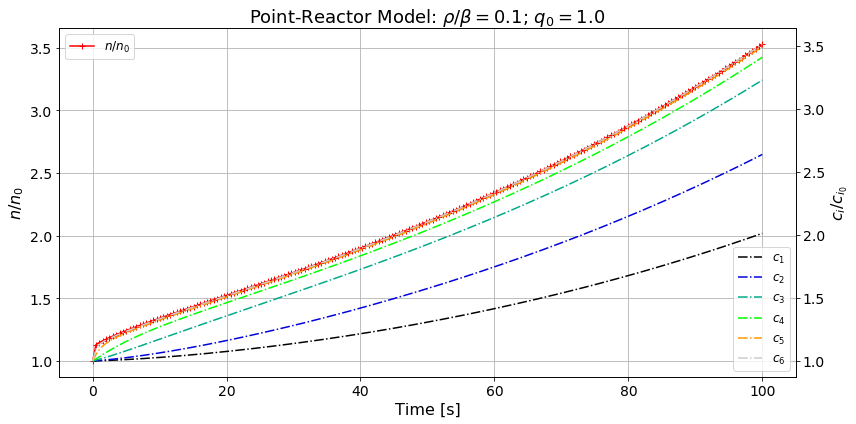

In [154]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [69]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n     c_1      c_2     c_3     c_4    c_5    c_6
0  0.000  0.520  89.921  242.612  59.662  44.340  3.408  0.471
1  0.503  0.538  89.938  242.726  59.763  44.534  3.455  0.483
2  1.005  0.540  89.958  242.858  59.875  44.733  3.489  0.488
3  1.508  0.541  89.980  243.001  59.992  44.925  3.513  0.490
4  2.010  0.543  90.004  243.153  60.113  45.110  3.531  0.491

      time      n      c_1      c_2     c_3     c_4    c_5    c_6
0   97.990  0.613  102.914  296.660  76.324  57.313  4.425  0.613
1   98.492  0.613  103.002  296.949  76.394  57.365  4.429  0.613
2   98.995  0.614  103.089  297.237  76.464  57.416  4.433  0.614
3   99.497  0.614  103.177  297.525  76.534  57.468  4.437  0.614
4  100.000  0.615  103.264  297.813  76.604  57.520  4.441  0.615



## Sudden Removal of Steady Source; Sub-Critical<a id="qremove"></a>

Assuming a steady-state, sub-critical reactor, $\rho_\text{ss}\lt 0$, then $n_\text{ss}=-\frac{q_\text{ss}\,\ell}{\rho_\text{ss}}$ for some $q_\text{ss}$. The source is then removed at $t = 0$, $q(t)=0$. This is referred as a source-jerk method.

In [201]:
'''Setup up initial conditions'''

import numpy as np

rho_ss_over_beta = -0.1

beta = params['beta'] # retrieve the delayed neutron fraction
rho_ss = rho_ss_over_beta * beta
params['reactivity'] = rho_ss 

params['n_ss'] = np.random.random() # pick an arbitray value for the steady state

params['q_0'] = 0.0

# setup remaining initial conditions
setup_initial_conditions(params)

In [207]:
'''Evolve the point-reactor'''

time_final   = 20 # s
n_time_steps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_steps'] = n_time_steps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

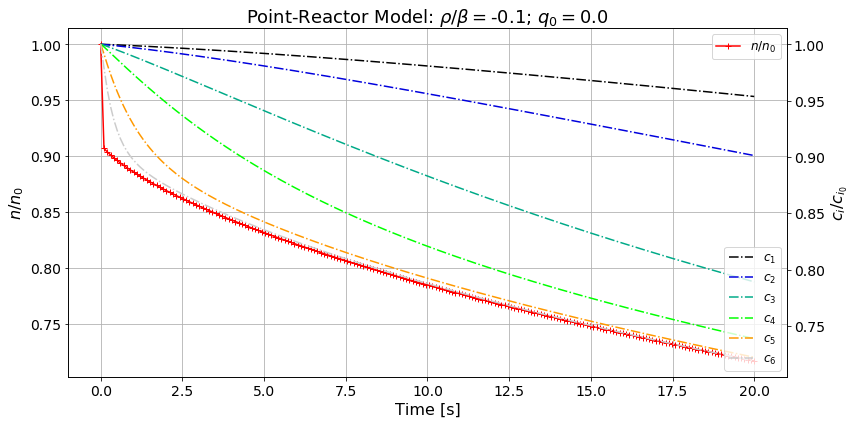

In [208]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [206]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n      c_1      c_2      c_3     c_4    c_5    c_6
0  0.000  0.987  170.792  460.808  113.321  84.218  6.474  0.895
1  0.503  0.885  170.691  460.142  112.736  83.092  6.202  0.827
2  1.005  0.875  170.576  459.386  112.096  81.957  6.011  0.803
3  1.508  0.866  170.451  458.576  111.432  80.869  5.876  0.792
4  2.010  0.858  170.319  457.719  110.753  79.836  5.777  0.783

      time      n      c_1      c_2     c_3     c_4    c_5    c_6
0   97.990  0.383  118.181  249.006  51.206  36.666  2.775  0.383
1   98.492  0.381  117.899  248.202  51.045  36.552  2.767  0.381
2   98.995  0.380  117.617  247.402  50.884  36.438  2.758  0.380
3   99.497  0.379  117.335  246.604  50.725  36.324  2.750  0.379
4  100.000  0.378  117.054  245.809  50.565  36.210  2.741  0.378



## Frequency Response to Source Fluctuation, Sub-Critical<a id="freqresp"></a>

Assuming a steady-state, sub-critical reactor, $\frac{\rho_\text{ss}}{\beta}\lt 0$, with some source $q_\text{ss}$, corresponding to $n_\text{ss}=-\frac{q_\text{ss}\,\ell}{\rho_\text{ss}}$,  apply a fluctuating source at $t = 0$, $q(t)=q_\text{ss} + \,\sin(2\pi\,w\,t)$ for a given cycle frequency $w$.

In [187]:
'''Source function'''

def q_source( t, params ):
    '''
    Neutron source sinusoidal fluctuation.  
    
    Parameters
    ----------
    t: float, required
        Time.
    params: dict, required
        Dictionary of quantities. Must have a `'q_0'` key/value pair. Must have a `'source_cycle_freq'`
        key/value pair.
    
    Returns
    -------
    q: float
        Value of source.

    Examples
    --------
    '''
    import math
    q_0 = params['q_0']
    w   = params['source_cycle_freq']
    
    q = q_0 + math.sin(2*math.pi*w * t) 
        
    return q

In [188]:
'''Setup up initial conditions'''

import numpy as np

rho_ss_over_beta = -0.1

beta = params['beta'] # retrieve the delayed neutron fraction
rho_ss = rho_ss_over_beta * beta
params['reactivity'] = rho_ss 

n_ss = np.random.random()
params['n_ss'] = n_ss # pick an arbitray value for the steady state
gen_time = params['gen_time'] # retrieve neutron generation time
q_ss = - n_ss * rho_ss / gen_time

params['q_0'] = q_ss

params['source_cycle_freq'] = 1/20 # 10-second period 

# setup remaining initial conditions
setup_initial_conditions(params)

In [189]:
'''Evolve the point-reactor'''

time_final   = 100 # s
n_time_steps = 200 # number of solution values in time

params['time_final']   = time_final
params['n_time_steps'] = n_time_steps

# Run the reactor and compute the history of the state variables; tabular form, one row per time stamp
u_vec_history = run_point_reactor( f_vec, params )

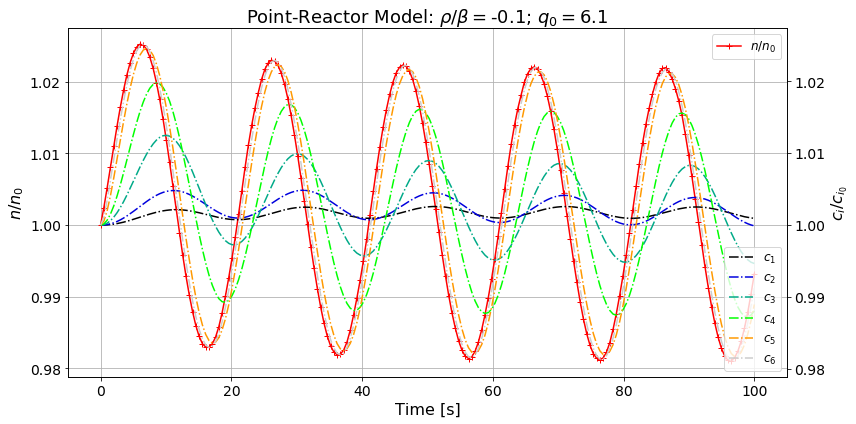

In [192]:
'''Plot neutron and delayed neutron emitter concentration in the reactor'''

plot_results(u_vec_history)

In [78]:
'''Look at the head and tail of the results'''

time_stamps = params['time_stamps']
peek(time_stamps,u_vec_history)

    time      n     c_1      c_2     c_3     c_4    c_5    c_6
0  0.000  0.232  40.177  108.399  26.657  19.811  1.523  0.211
1  0.503  0.235  40.178  108.407  26.664  19.825  1.526  0.212
2  1.005  0.237  40.182  108.432  26.686  19.866  1.535  0.214
3  1.508  0.240  40.188  108.476  26.723  19.933  1.548  0.216
4  2.010  0.243  40.198  108.538  26.775  20.023  1.563  0.218

      time      n     c_1      c_2     c_3     c_4    c_5    c_6
0   97.990  0.196  40.386  108.691  26.257  18.839  1.415  0.196
1   98.492  0.197  40.370  108.585  26.190  18.804  1.421  0.197
2   98.995  0.199  40.355  108.493  26.138  18.797  1.430  0.199
3   99.497  0.201  40.343  108.420  26.103  18.818  1.442  0.201
4  100.000  0.203  40.334  108.365  26.085  18.867  1.456  0.203



## Interactive Results <a id="ires"></a>
Here we can change the parameters interactively and obtain compute the dynamics automatically.

In [79]:
'''Create interactive plots'''

import plotly.offline as py
py.init_notebook_mode()
import plotly.graph_objs as go


layout=go.Layout(title="Point-Reactor Model", 
                 xaxis={'title':'Time [s]'}, 
                 yaxis=dict(side='left',title='HELLO'), 
                 yaxis2=dict(overlaying='y',anchor='x',side='right',title='HELLO')
                )

fig = go.FigureWidget(layout=layout)

scatt = fig.add_scatter()

fig.layout.titlefont.size = 22
fig.layout.titlefont.family = 'Rockwell'
fig.layout.xaxis.title = 'Time [s]'
fig.layout.yaxis.title = 'n/n_0'
#fig.layout.yaxis2.title = 'T [K]'

In [80]:
'''Vary parameters and display results interactively'''

from ipywidgets import interact
import ipywidgets as widgets
#display(widgets.FloatSlider(readout_format='8.4e'))
@interact(time_final=widgets.FloatSlider(description=r'$t_{max}\,[\text{s}]$',value=100,min=1,max=500,step=10,readout_format='3.0f'),
          rho_over_beta=widgets.FloatSlider(description=r'$\rho/\beta=$',value=0.01,min=-0.1,max=0.1,step=0.01,readout_format='5.3f'), 
          gen_time=widgets.FloatSlider(description=r'$\ell\,[\text{s}]=$',value=1e-4,min=1e-5,max=1e-3,step=1e-4,readout_format='5.3e'),
          select=widgets.Dropdown(description='select:',value='neutron_density',options=['neutron_density', 'c_1','c_6']) 
         )
def update(time_final, rho_over_beta, gen_time, select):
    with fig.batch_update():
        
        n_time_stamps = params['n_time_stamps']
        params['time_final'] = time_final
        time_stamps = np.linspace(0.0, time_final, num=n_time_stamps)
        params['time_stamps'] = time_stamps
        scatt.x=time_stamps
        
        beta = params['beta']
        params['reactivity'] = rho_over_beta * beta
        params['gen_time'] = gen_time
        
        setup_initial_conditions(params)
        
        history = run_point_reactor( f_vec, params )
        
        if select == 'neutron_density':
            scatt.y=history[:,0]/params['n_0']
            scatt.line.color='red'
            fig.layout.yaxis.title = 'n/n_0'
        elif select == 'c_1':
            scatt.y=history[:,1]/params['c_vec_0'][0]
            scatt.line.color='blue'
            fig.layout.yaxis.title = 'c_1/c_1_0'
        elif select == 'c_6':
            scatt.y=history[:,6]/params['c_vec_0'][5]
            scatt.line.color='blue'
            fig.layout.yaxis.title = 'c_6/c_6_0'
        else:
            pass
fig

interactive(children=(FloatSlider(value=100.0, description='$t_{max}\\,[\\text{s}]$', max=500.0, min=1.0, read…

FigureWidget({
    'data': [{'line': {'color': 'red'},
              'type': 'scatter',
              'uid': '…